# EXTRACCIÓN DE DATOS

Paletas de sombras, pintalabios y colorete en función de la paleta de colores asignadas, siendo estas:

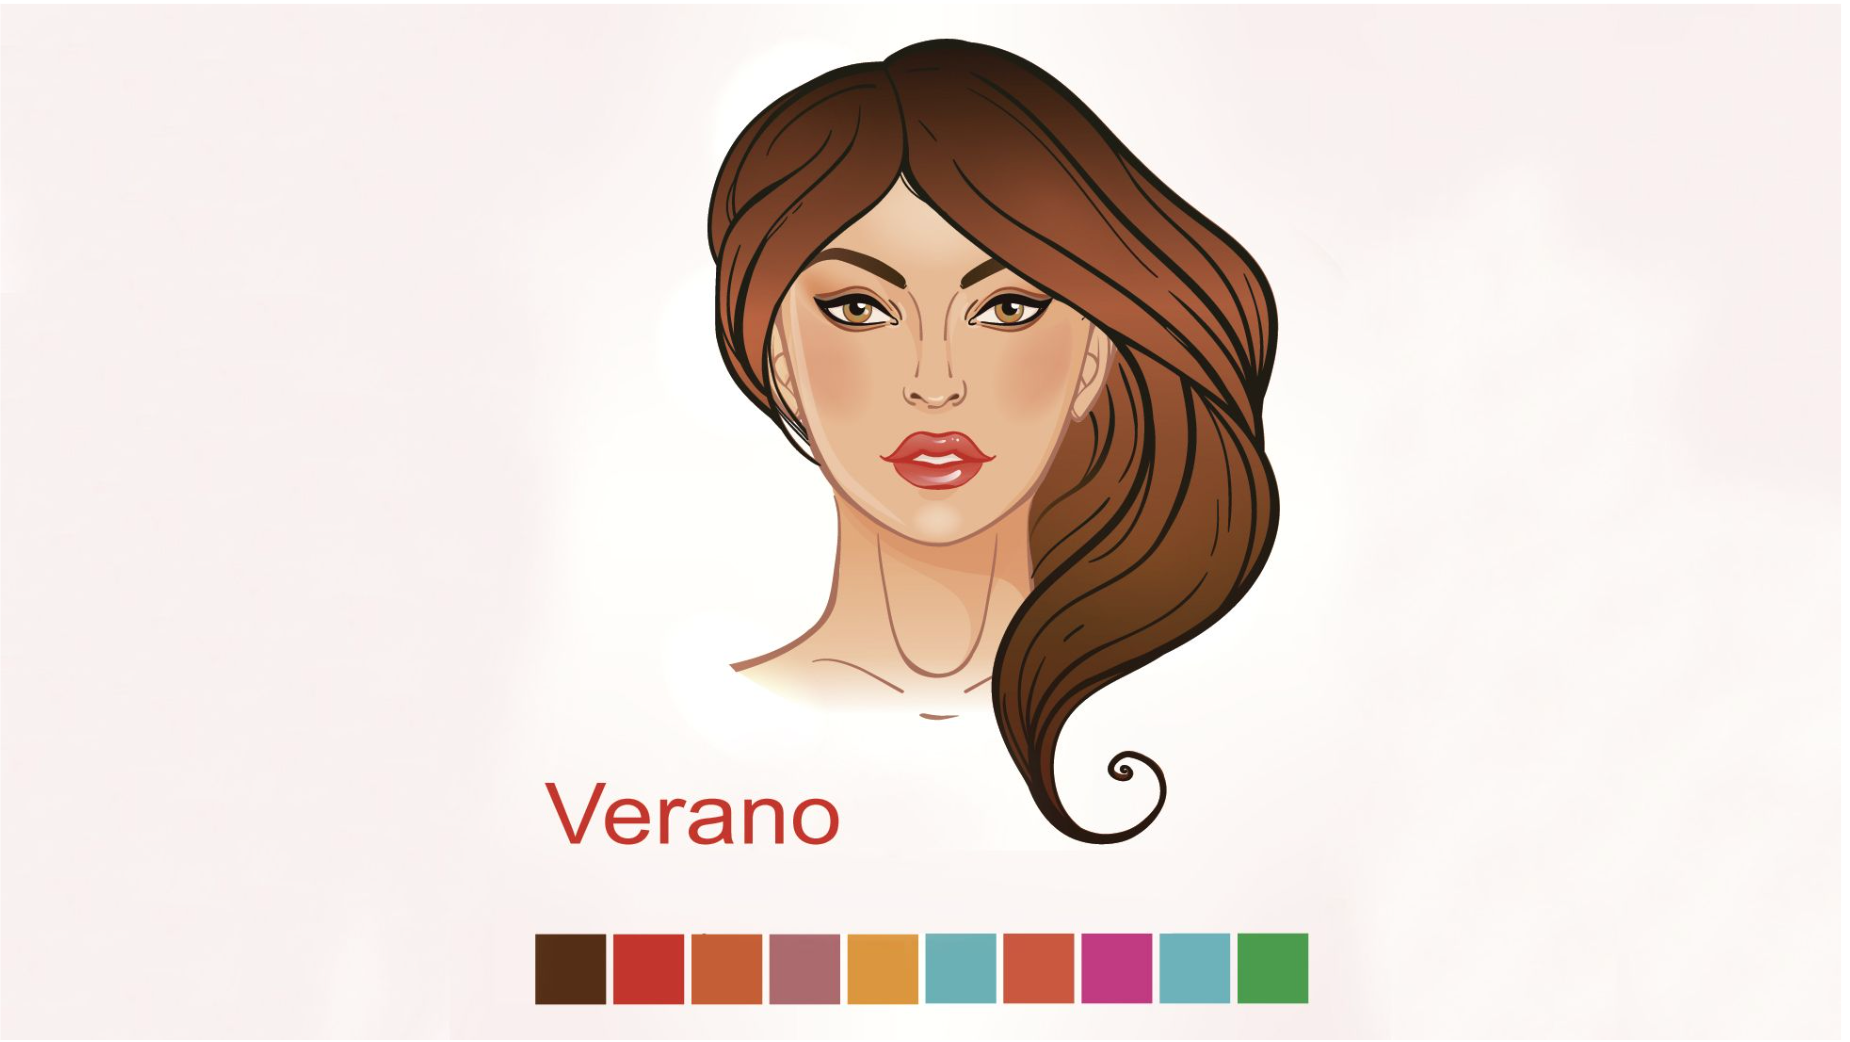

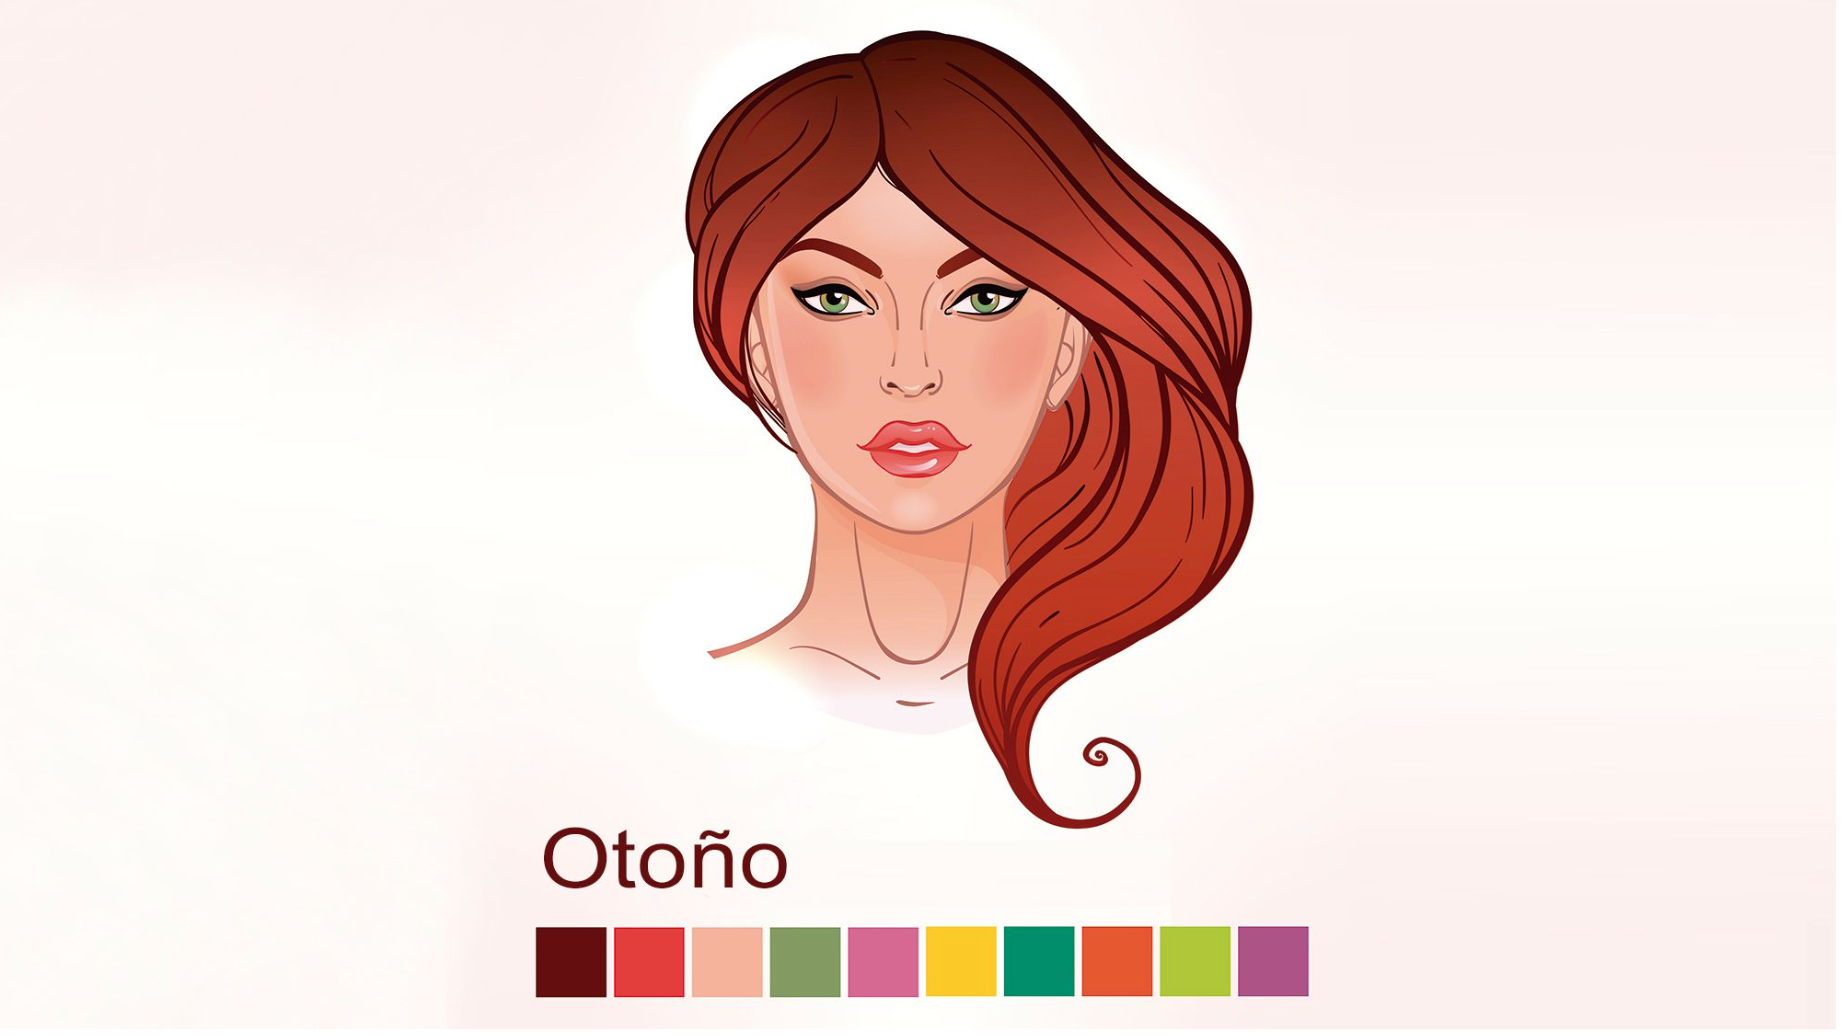

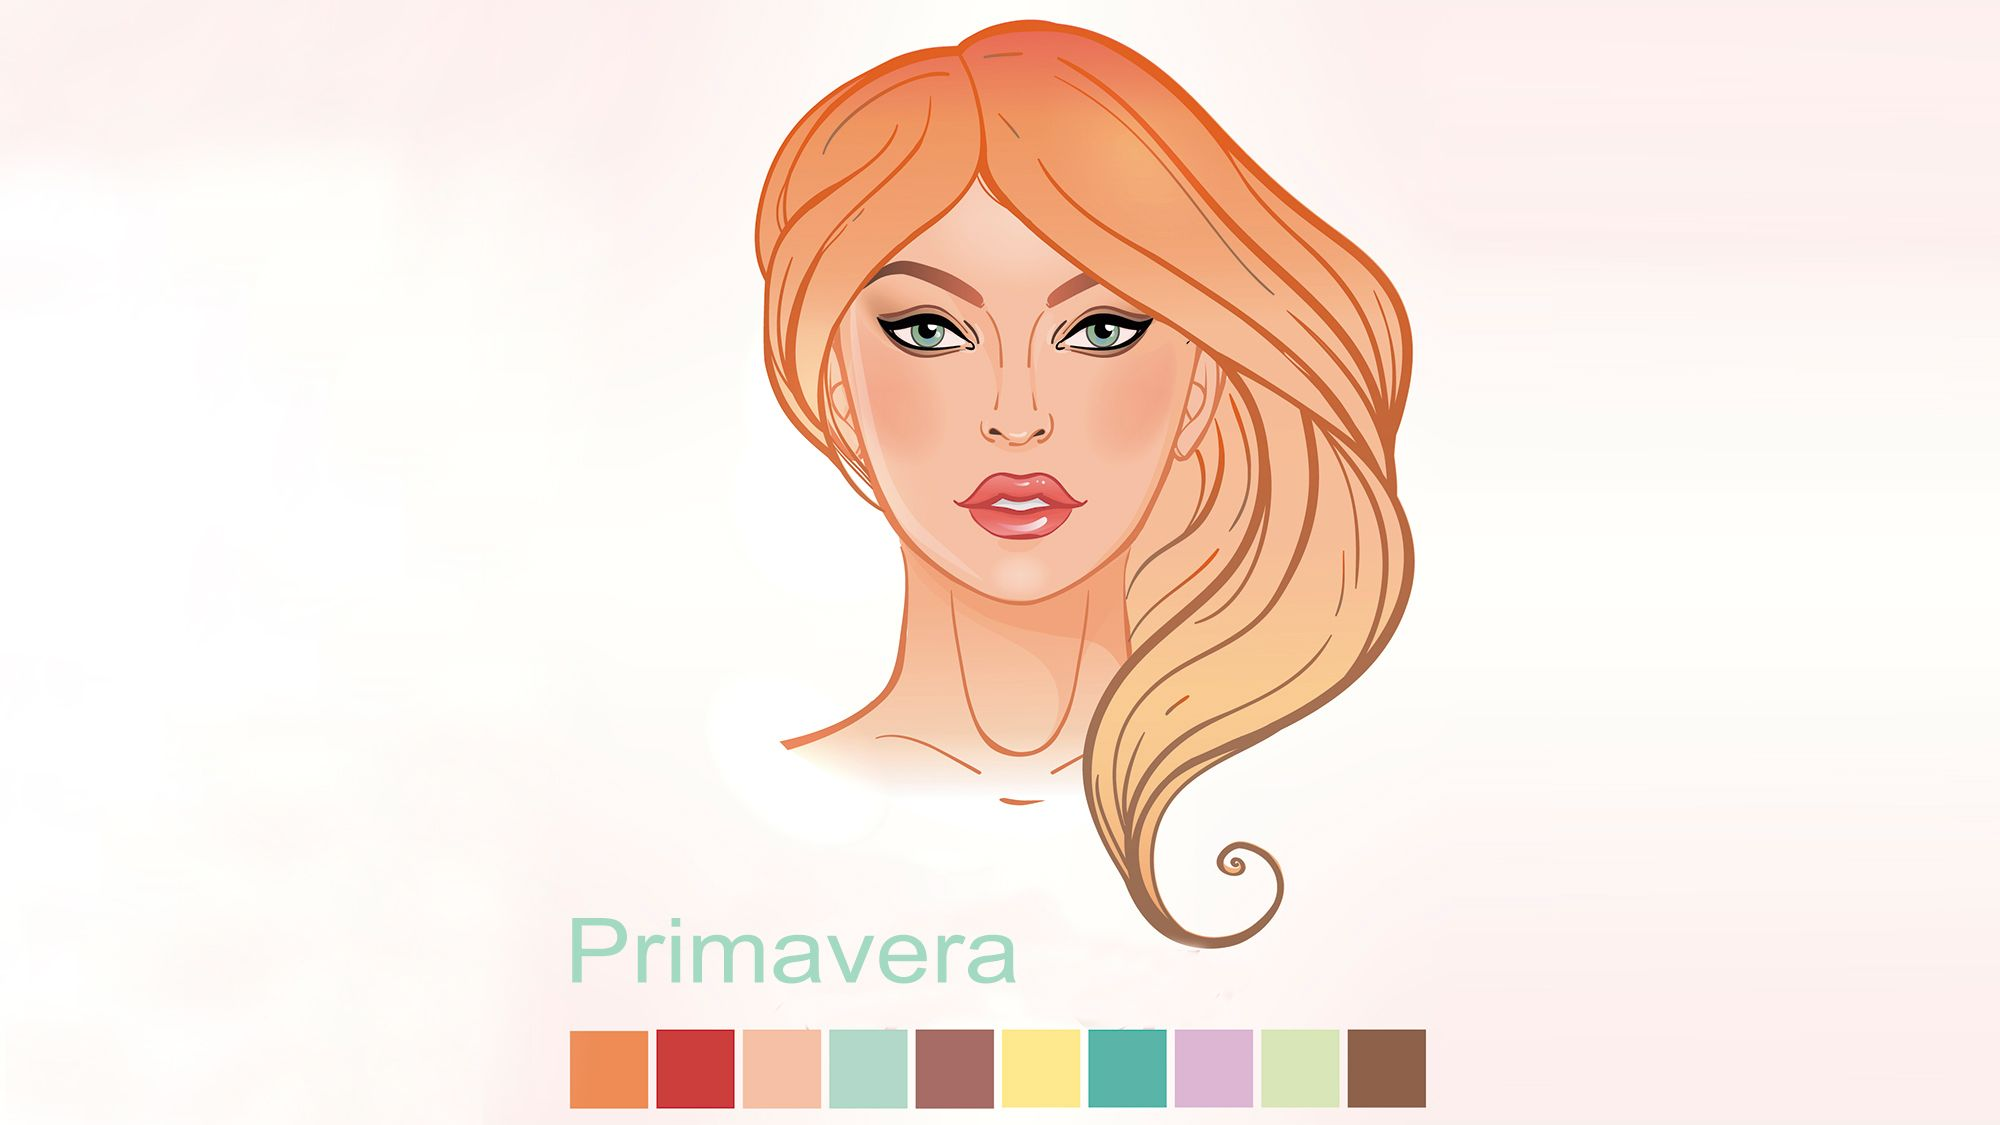

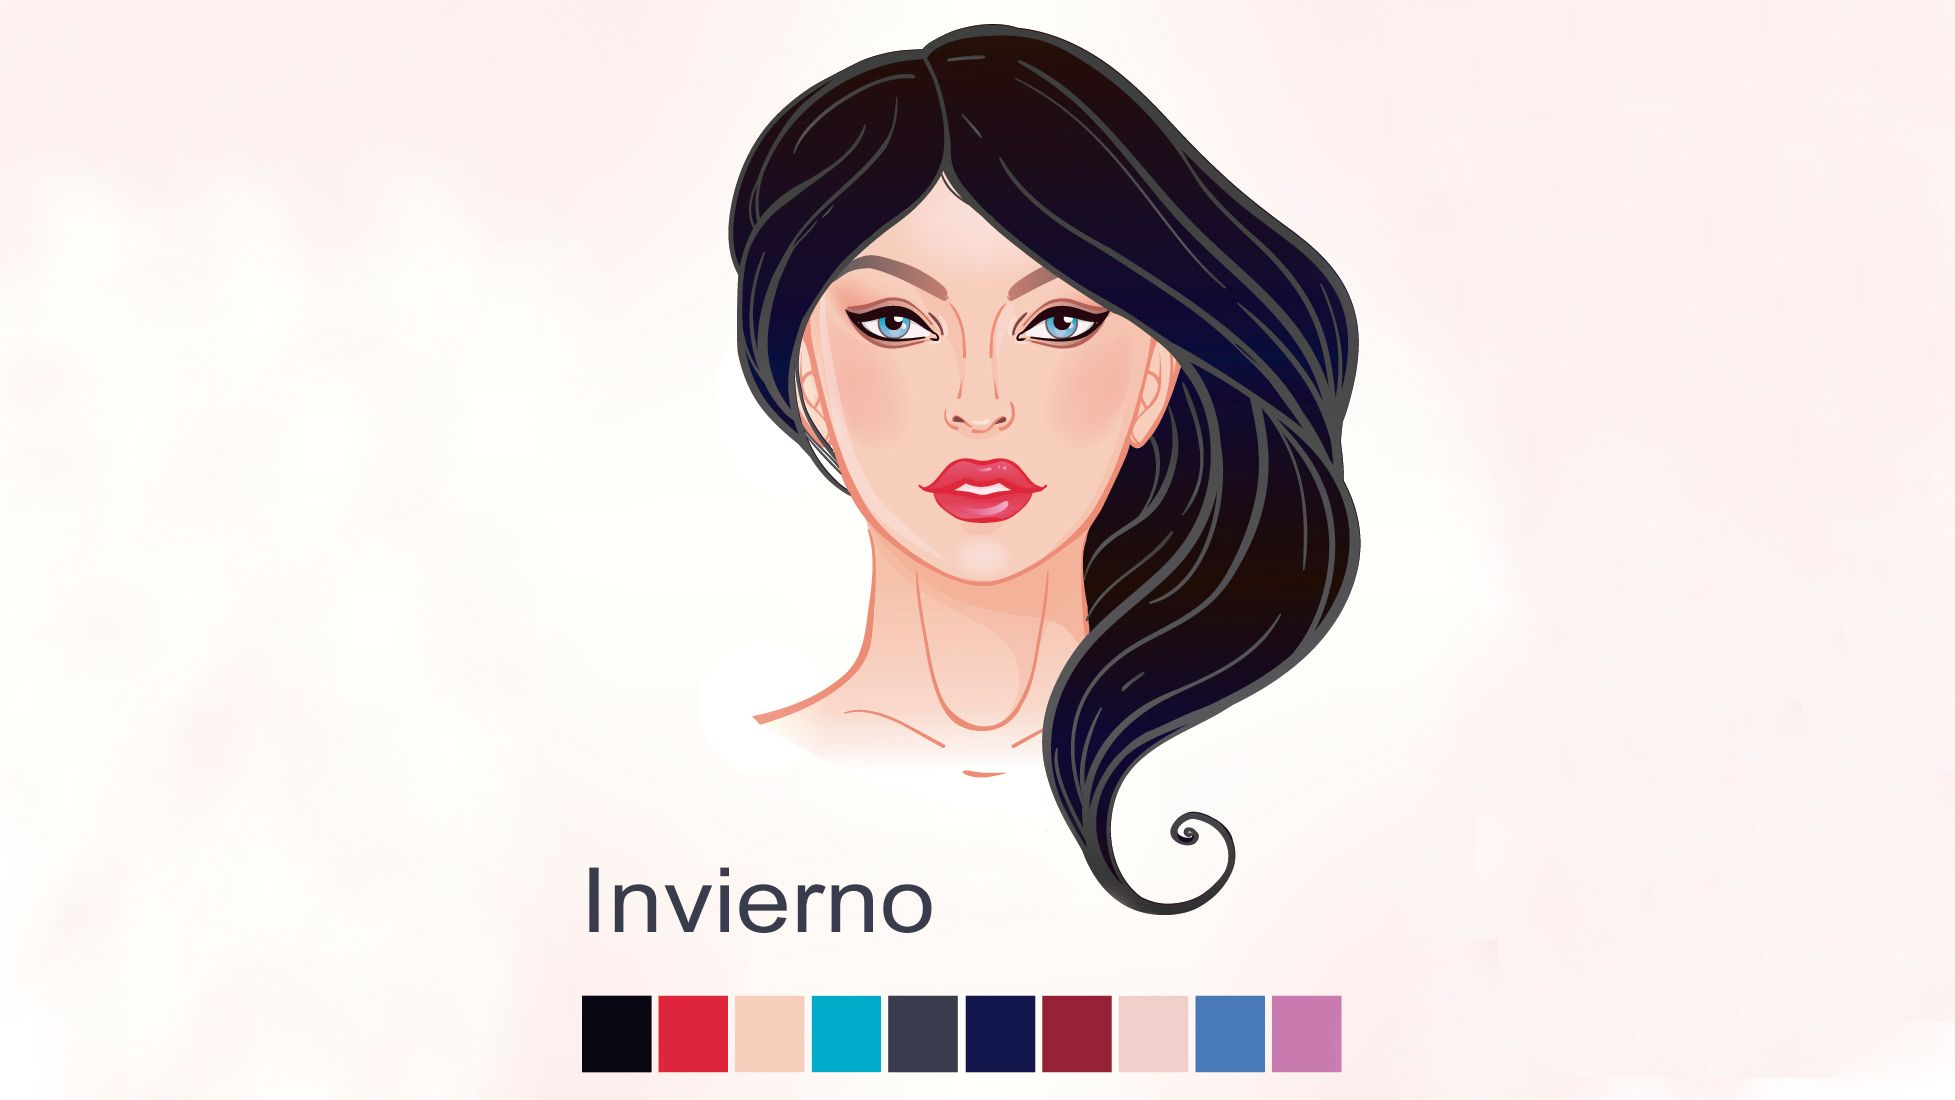

**IMPORTACIONES**

In [1]:
from selenium import webdriver
import pandas as pd
import numpy as np
from webdriver_manager.chrome import ChromeDriverManager
from joblib import Parallel, delayed
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import time
import re

In [2]:
pd.set_option('display.max_rows', None)

Ahora, vamos a scrappear los productos de maquillaje con mejor rating que se ajusten a las paletas de colores\
de cada estación. Sacaremos nombre, precio y rating.

In [3]:
PATH=ChromeDriverManager().install()

driver=webdriver.Chrome(PATH)  

/var/folders/fg/hm_rz3k53fv5qf5dywc0bfwr0000gn/T/ipykernel_52513/235325829.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome(PATH)


*Existen varios productos que podemos recomendar segun la colometría de las personas. En este caso, nos centraremos\
en sombras de ojos, pintalabios y colorete, puesto que es la cosmética de color más fácil de asignar a un tipo de \
paleta*

Por otra parte, debemos tener en cuenta que hay varias tiendas donde podemos encontrar productos de maquillaje.\
Concretamente, en nuestro proyecto, los escogeremos de las siguientes:

1. **PRIMOR** - Nº 1 PERFUMERÍA / COSMÉTICA EN ESPAÑA
2. **URBAN DECAY** - TOP 10 MEJORES MARCAS PARA SOMBRAS A NIVEL MUNDIAL
3. **HUDA BEAUTY** - TOP 10 MEJORES MARCAS PARA SOMBRAS Y PINTALABIOS A NIVEL MUNDIAL
4. **KIKO** - TOP 10 MEJORES MARCAS PARA PINTALABIOS A NIVEL MUNDIAL
5. **KAT VON D** - TOP 10 MEJORES MARCAS PARA PINTALABIOS A NIVEL MUNDIAL
6. **BENEFIT** - TOP 10 MEJORES MARCAS PARA COLORETES A NIVEL MUNDIAL
7. **NARS** - TOP 10 MEJORES MARCAS PARA SOMBRAS, COLORETES Y PINTALABIOS A NIVEL MUNDIAL
8. **CHARLOTTE TILBURY** - TOP 10 MEJORES MARCAS PARA COLORETES
9. **BOBBI BROWN** - TOP 10 MEJORES MARCAS PARA PINTALABIOS Y SOMBRAS

En ellas, podremos encontrar variedad de precio, composición y producto.

# **1 - EXTRACCIÓN DE DATOS  Y LIMPIEZA DE PRIMOR: SOMBRAS, PINTALABIOS Y COLORETES**

*SOMBRAS*

In [4]:
def extraer(URL):
    driver = webdriver.Chrome(PATH)
    driver.get(URL)
    
    driver.execute_script('window.scrollTo(0, 3000);')  # 200px de scroll
    time.sleep(5)
    
    filas = driver.find_elements(By.CLASS_NAME, 'df-card__content')
    link = driver.find_elements(By.CLASS_NAME, 'df-card__main')
    tmp = []
    links = []

    for e in filas:
        tmp.append(e.text.split('\n'))
    
    for e in link:
        links.append(e.get_attribute('href'))
    
    cols = ['NOMBRE', 'TIPO', 'PRECIO']
    
    total = pd.DataFrame(tmp, columns = cols)
    
    total['LINKS'] = links
    total['PRODUCTO'] = 'SOMBRAS DE OJOS'
    total.drop(['TIPO'], axis = 1, inplace = True)
    
    driver.quit()
     
    return total

In [5]:
links_sombras_primor = ['https://www.primor.eu/#/dfclassic/query=paletas%20sombras%20verano&filter%5Bcategories%5D%5B0%5D=Paletas%20de%20sombras%20de%20ojos%20y%20maquillaje&session_id=e68b0b5ac1828fdb430ff5b492adb6e5&query_name=match_and',\
               'https://www.primor.eu/#/dfclassic/query=paletas%20sombras%20oto%C3%B1al&session_id=e68b0b5ac1828fdb430ff5b492adb6e5&query_name=match_and',\
               'https://www.primor.eu/#/dfclassic/query=paletas%20sombras%20invierno&filter%5Bcategories%5D%5B0%5D=Ojos%20lujo&filter%5Bcategories%5D%5B1%5D=Paletas%20de%20sombras%20de%20ojos%20y%20maquillaje&filter%5Bcategories%5D%5B2%5D=Sombras%20de%20ojos%20lujo&session_id=e68b0b5ac1828fdb430ff5b492adb6e5&query_name=match_and',\
               'https://www.primor.eu/#/dfclassic/query=paletas%20sombras%20pastel&filter%5Bcategories%5D%5B0%5D=Paletas%20de%20sombras%20de%20ojos%20y%20maquillaje&filter%5Bcategories%5D%5B1%5D=Sombras%20de%20ojos&session_id=e68b0b5ac1828fdb430ff5b492adb6e5&query_name=match_and']

In [6]:
productos = Parallel(n_jobs=4, verbose=True)(delayed(extraer)(e) for e in links_sombras_primor)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
/var/folders/fg/hm_rz3k53fv5qf5dywc0bfwr0000gn/T/ipykernel_52513/615978652.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/fg/hm_rz3k53fv5qf5dywc0bfwr0000gn/T/ipykernel_52513/615978652.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/fg/hm_rz3k53fv5qf5dywc0bfwr0000gn/T/ipykernel_52513/615978652.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/fg/hm_rz3k53fv5qf5dywc0bfwr0000gn/T/ipykernel_52513/615978652.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   42.5s remaining:   42.5s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   55.5s finished


In [7]:
sombras_ver_prim = productos[0] 
sombras_oto_prim = productos[1] 
sombras_inv_prim = productos[2] 
sombras_pri_prim = productos[3] 
#productos_totales = pd.concat([productos[0], productos[1], productos[2], productos[3]], axis = 0)

In [8]:
ad1 = extraer('https://www.primor.eu/#/dfclassic/query=sombras%20krash%20rosas&filter%5Bcategories%5D%5B0%5D=Paletas%20de%20sombras%20de%20ojos%20y%20maquillaje&filter%5Bcategories%5D%5B1%5D=Sombras%20de%20ojos&filter%5Bbrand%5D%5B0%5D=Krash%20Kosmetics&session_id=e68b0b5ac1828fdb430ff5b492adb6e5&query_name=match_and')
ad2 = extraer('https://www.primor.eu/#/dfclassic/query=sombras%20lilas&filter%5Bcategories%5D%5B0%5D=Maquillaje%20de%20ojos&session_id=e68b0b5ac1828fdb430ff5b492adb6e5&query_name=match_and')
ad3 = extraer('https://www.primor.eu/#/dfclassic/query=sombras%20negras&filter%5Bcategories%5D%5B0%5D=Maquillaje%20de%20ojos&session_id=e68b0b5ac1828fdb430ff5b492adb6e5&query_name=match_and')
ad4 = extraer('https://www.primor.eu/#/dfclassic/query=sombras%20naranjas&session_id=e68b0b5ac1828fdb430ff5b492adb6e5&query_name=match_and')

/var/folders/fg/hm_rz3k53fv5qf5dywc0bfwr0000gn/T/ipykernel_52513/615978652.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH)
/var/folders/fg/hm_rz3k53fv5qf5dywc0bfwr0000gn/T/ipykernel_52513/615978652.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH)
/var/folders/fg/hm_rz3k53fv5qf5dywc0bfwr0000gn/T/ipykernel_52513/615978652.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH)
/var/folders/fg/hm_rz3k53fv5qf5dywc0bfwr0000gn/T/ipykernel_52513/615978652.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH)


In [9]:
#Limpiamos los índices y añadimos lo que hemos sacado más

#PRIMAVERA
sombras_pri_prim = pd.concat([sombras_pri_prim, ad1], axis = 0)
sombras_pri_prim.drop_duplicates(inplace = True)
sombras_pri_prim['ID'] = [e for e in range(len(sombras_pri_prim))]
sombras_pri_prim.set_index('ID', drop = True, inplace = True)

#OTOÑO
sombras_oto_prim = pd.concat([sombras_oto_prim, ad2], axis = 0)
sombras_oto_prim.drop_duplicates(inplace = True)
sombras_oto_prim['ID'] = [e for e in range(len(sombras_oto_prim))]
sombras_oto_prim.set_index('ID', drop = True, inplace = True)

#INVIERNO
sombras_inv_prim = pd.concat([sombras_inv_prim, ad3], axis = 0)
sombras_inv_prim.drop_duplicates(inplace = True)
sombras_inv_prim['ID'] = [e for e in range(len(sombras_inv_prim))]
sombras_inv_prim.set_index('ID', drop = True, inplace = True)

#VERANO
sombras_ver_prim = pd.concat([sombras_ver_prim, ad4], axis = 0)
sombras_ver_prim.drop_duplicates(inplace = True)
sombras_ver_prim['ID'] = [e for e in range(len(sombras_ver_prim))]
sombras_ver_prim.set_index('ID', drop = True, inplace = True)

In [10]:
sombras_pri_prim['PALETA'] = 'PRIMAVERA'
sombras_oto_prim['PALETA'] = 'OTOÑO'
sombras_inv_prim['PALETA'] = 'INVIERNO'
sombras_ver_prim['PALETA'] = 'VERANO'

*PINTALABIOS*

In [11]:
def extraer(URL):
    driver = webdriver.Chrome(PATH)
    driver.get(URL)
    
    driver.execute_script('window.scrollTo(0, 3000);')  # 200px de scroll
    time.sleep(5)
    
    filas = driver.find_elements(By.CLASS_NAME, 'df-card__content')
    link = driver.find_elements(By.CLASS_NAME, 'df-card__main')
    tmp = []
    links = []

    for e in filas:
        tmp.append(e.text.split('\n'))
    
    for e in link:
        links.append(e.get_attribute('href'))
    
    cols = ['NOMBRE', 'TIPO', 'PRECIO']
    
    total = pd.DataFrame(tmp, columns = cols)
    
    total['LINKS'] = links
    total['PRODUCTO'] = 'PINTALABIOS'
    
    driver.quit()
     
    return total

In [12]:
links_pintalabios_primor = ['https://www.primor.eu/#/dfclassic/query=pintalabios%20vivid%20&filter%5Bcategories%5D%5B0%5D=Pintalabios%20y%20maquillaje%20de%20labios&session_id=e68b0b5ac1828fdb430ff5b492adb6e5&query_name=match_and',\
                           'https://www.primor.eu/#/dfclassic/query=pintalabios%20neutro&filter%5Bcategories%5D%5B0%5D=Barras%20de%20labios%20lujo&filter%5Bcategories%5D%5B1%5D=Pintalabios%20y%20maquillaje%20de%20labios&session_id=e68b0b5ac1828fdb430ff5b492adb6e5&query_name=match_and',\
                           'https://www.primor.eu/#/dfclassic/query=pintalabios%20oscuro&filter%5Bcategories%5D%5B0%5D=Pintalabios%20y%20maquillaje%20de%20labios&session_id=e68b0b5ac1828fdb430ff5b492adb6e5&query_name=match_and',\
                           'https://www.primor.eu/#/dfclassic/query=pintalabios%20rosados&filter%5Bcategories%5D%5B0%5D=Pintalabios%20y%20maquillaje%20de%20labios&filter%5Bbrand%5D%5B0%5D=Revolution&filter%5Bbrand%5D%5B1%5D=NYX%20Professional%20Makeup&filter%5Bbrand%5D%5B2%5D=Krash%20Kosmetics&session_id=e68b0b5ac1828fdb430ff5b492adb6e5&query_name=match_and']

In [13]:
productos1 = Parallel(n_jobs=4, verbose=True)(delayed(extraer)(e) for e in links_pintalabios_primor)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
/var/folders/fg/hm_rz3k53fv5qf5dywc0bfwr0000gn/T/ipykernel_52513/2901359687.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/fg/hm_rz3k53fv5qf5dywc0bfwr0000gn/T/ipykernel_52513/2901359687.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/fg/hm_rz3k53fv5qf5dywc0bfwr0000gn/T/ipykernel_52513/2901359687.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/fg/hm_rz3k53fv5qf5dywc0bfwr0000gn/T/ipykernel_52513/2901359687.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   37.5s remaining:   37.5s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   50.1s finished


In [14]:
#Añadimos más filas
add1 = extraer('https://www.primor.eu/#/dfclassic/query=pintalabios%20rosados&filter%5Bcategories%5D%5B0%5D=Pintalabios%20y%20maquillaje%20de%20labios&filter%5Bbrand%5D%5B0%5D=NYX%20Professional%20Makeup&filter%5Bbrand%5D%5B1%5D=Krash%20Kosmetics&session_id=e68b0b5ac1828fdb430ff5b492adb6e5&query_name=match_and')
add2 = extraer('https://www.primor.eu/#/dfclassic/query=berry%20nars&filter%5Bbrand%5D%5B0%5D=NARS&filter%5Bcategories%5D%5B0%5D=Labios%20lujo&session_id=e68b0b5ac1828fdb430ff5b492adb6e5&query_name=match_or')
add3 = extraer('https://www.primor.eu/#/dfclassic/query=nude%20nars&session_id=e68b0b5ac1828fdb430ff5b492adb6e5&query_name=match_and')
add4 = extraer('https://www.primor.eu/#/dfclassic/query=dark%20nars&filter%5Bbrand%5D%5B0%5D=NARS&filter%5Bcategories%5D%5B0%5D=Barras%20de%20labios%20lujo&session_id=e68b0b5ac1828fdb430ff5b492adb6e5&query_name=match_or')
add5 = extraer('https://www.primor.eu/#/dfclassic/query=mac%20lips&session_id=e68b0b5ac1828fdb430ff5b492adb6e5&query_name=match_and')

/var/folders/fg/hm_rz3k53fv5qf5dywc0bfwr0000gn/T/ipykernel_52513/2901359687.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH)
/var/folders/fg/hm_rz3k53fv5qf5dywc0bfwr0000gn/T/ipykernel_52513/2901359687.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH)
/var/folders/fg/hm_rz3k53fv5qf5dywc0bfwr0000gn/T/ipykernel_52513/2901359687.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH)
/var/folders/fg/hm_rz3k53fv5qf5dywc0bfwr0000gn/T/ipykernel_52513/2901359687.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH)
/var/folders/fg/hm_rz3k53fv5qf5dywc0bfwr0000gn/T/ipykernel_52513/2901359687.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver 

In [15]:
pintalab_ver_prim = productos1[0] 
pintalab_oto_prim = productos1[1] 
pintalab_inv_prim = productos1[2] 
pintalab_pri_pri = productos1[3]

In [16]:
#Limpiamos los índices y añadimos lo que hemos sacado más

#PRIMAVERA
pintalab_pri_prim = pd.concat([pintalab_pri_pri, add1, add3], axis = 0)
pintalab_pri_prim.drop_duplicates(inplace = True)
pintalab_pri_prim['ID'] = [e for e in range(len(pintalab_pri_prim))]
pintalab_pri_prim.set_index('ID', drop = True, inplace = True)

#OTOÑO
pintalab_oto_prim = pd.concat([pintalab_pri_pri, add1], axis = 0)
pintalab_oto_prim.drop_duplicates(inplace = True)
pintalab_oto_prim['ID'] = [e for e in range(len(pintalab_oto_prim))]
pintalab_oto_prim.set_index('ID', drop = True, inplace = True)

#INVIERNO
pintalab_inv_prim = pd.concat([pintalab_pri_pri, add4], axis = 0)
pintalab_inv_prim.drop_duplicates(inplace = True)
pintalab_inv_prim['ID'] = [e for e in range(len(pintalab_inv_prim))]
pintalab_inv_prim.set_index('ID', drop = True, inplace = True)

#VERANO
pintalab_ver_prim = pd.concat([pintalab_pri_pri, add5], axis = 0)
pintalab_ver_prim.drop_duplicates(inplace = True)
pintalab_ver_prim['ID'] = [e for e in range(len(pintalab_ver_prim))]
pintalab_ver_prim.set_index('ID', drop = True, inplace = True)

In [17]:
pintalab_pri_prim['PALETA'] = 'PRIMAVERA'
pintalab_oto_prim['PALETA'] = 'OTOÑO'
pintalab_inv_prim['PALETA'] = 'INVIERNO'
pintalab_ver_prim['PALETA'] = 'VERANO'

*COLORETES*

In [18]:
def extraer(URL):
    driver = webdriver.Chrome(PATH)
    driver.get(URL)
    
    driver.execute_script('window.scrollTo(0, 3000);')  # 200px de scroll
    time.sleep(5)
    
    filas = driver.find_elements(By.CLASS_NAME, 'df-card__content')
    link = driver.find_elements(By.CLASS_NAME, 'df-card__main')
    tmp = []
    links = []

    for e in filas:
        tmp.append(e.text.split('\n'))
    
    for e in link:
        links.append(e.get_attribute('href'))
    
    cols = ['NOMBRE', 'TIPO', 'PRECIO']
    
    total = pd.DataFrame(tmp, columns = cols)
    
    total['LINKS'] = links
    total['PRODUCTO'] = 'COLORETE'
    
    driver.quit()
     
    return total

In [19]:
links_blush_primor = ['https://www.primor.eu/3ina/66421-colorete-the-blush.html#/dfclassic/query=blush&filter%5Bbrand%5D%5B0%5D=MAC&session_id=e68b0b5ac1828fdb430ff5b492adb6e5&query_name=match_and',\
                     'https://www.primor.eu/#/dfclassic/query=blush&filter%5Bbrand%5D%5B0%5D=NARS&session_id=e68b0b5ac1828fdb430ff5b492adb6e5&query_name=match_and',\
                     'https://www.primor.eu/#/dfclassic/query=blush%20rosa&filter%5Bbrand%5D%5B0%5D=3ina&session_id=e68b0b5ac1828fdb430ff5b492adb6e5&query_name=match_and',\
                     'https://www.primor.eu/#/dfclassic/query=blush&filter%5Bbrand%5D%5B0%5D=Yves%20Saint%20Laurent&session_id=e68b0b5ac1828fdb430ff5b492adb6e5&query_name=match_and']

In [20]:
productos2 = Parallel(n_jobs=4, verbose=True)(delayed(extraer)(e) for e in links_blush_primor)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
/var/folders/fg/hm_rz3k53fv5qf5dywc0bfwr0000gn/T/ipykernel_52513/2151634748.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/fg/hm_rz3k53fv5qf5dywc0bfwr0000gn/T/ipykernel_52513/2151634748.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/fg/hm_rz3k53fv5qf5dywc0bfwr0000gn/T/ipykernel_52513/2151634748.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/fg/hm_rz3k53fv5qf5dywc0bfwr0000gn/T/ipykernel_52513/2151634748.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   38.6s remaining:   38.6s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   46.1s finished


In [21]:
blush_pri_prim = productos1[0] 
blush_ver_prim = productos1[1] 
blush_inv_prim = productos1[2] 
blush_oto_prim = productos1[3]

In [22]:
blush_pri_prim['PALETA'] = 'PRIMAVERA'
blush_ver_prim['PALETA'] = 'VERANO'
blush_inv_prim['PALETA'] = 'INVIERNO'
blush_oto_prim['PALETA'] = 'OTOÑO'

In [23]:
maquillaje_primor = pd.concat([sombras_pri_prim, sombras_ver_prim, sombras_oto_prim, sombras_inv_prim, \
                              pintalab_pri_prim, pintalab_ver_prim, pintalab_oto_prim, pintalab_inv_prim, \
                              blush_pri_prim, blush_ver_prim, blush_oto_prim, blush_inv_prim])

In [24]:
maquillaje_primor.drop('TIPO', axis = 1, inplace = True)

*LIMPIEZA*

In [26]:
#Limpiamos la columna de PRECIO
def limpiar_precios(columna):
    return columna.split()[0]

maquillaje_primor.PRECIO = maquillaje_primor.PRECIO.apply(limpiar_precios)

p = []
for e in maquillaje_primor.PRECIO:
    if ',' in e:
        p.append(float(e.replace(',', '.')))
        
        
maquillaje_primor.PRECIO = p
maquillaje_primor.rename(columns = {'PRECIO': 'PRECIO (€)'}, inplace = True ) 

In [27]:
#Añadimos la columna 'TIENDA' para indicar dónde comprar los productos
maquillaje_primor['TIENDA'] = 'PRIMOR'

In [28]:
#Cambiamos el tipo de dato a nuestro nuevo dataframe
maquillaje_primor[['NOMBRE', 'LINKS', 'PRODUCTO', 'PALETA', 'TIENDA']] =\
maquillaje_primor[['NOMBRE', 'LINKS', 'PRODUCTO', 'PALETA', 'TIENDA']].astype('category')

In [29]:
maquillaje_primor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543 entries, 0 to 29
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NOMBRE      543 non-null    category
 1   PRECIO (€)  543 non-null    float64 
 2   LINKS       543 non-null    category
 3   PRODUCTO    543 non-null    category
 4   PALETA      543 non-null    category
 5   TIENDA      543 non-null    category
dtypes: category(5), float64(1)
memory usage: 28.8 KB


# 2 - EXTRACCIÓN DE DATOS DE URBAN DECAY: SOMBRAS Y COLORETES

*SOMBRAS*

In [59]:
def extraer(URL):
    PATH=ChromeDriverManager().install()
    driver = webdriver.Chrome(PATH)
    driver.get(URL)
    
    time.sleep(5)
    driver.find_element(By.CSS_SELECTOR, 'body>div.c-modal.h-text-align-center.m-borderless.m-autosize-large.m-image.m-opened.h-fade-in>div>button').click() 
    time.sleep(5)
    driver.execute_script('window.scrollTo(0, 3000);')  # 200px de scroll
    time.sleep(5)
    nombre = driver.find_elements(By.CLASS_NAME, 'c-product-tile__name') #nombre
    time.sleep(5)
    precio = driver.find_elements(By.CLASS_NAME, 'c-product-tile__price') #precio
    time.sleep(5)
    links1 = driver.find_elements(By.CLASS_NAME, 'c-product-image__link') #links
        
    tmp = [e.text for e in nombre]
    
    precios = [e.text.split('\n')[-1] for e in precio]
    
    links = [e.get_attribute('href') for e in links1]
    
    cols = ['NOMBRE']
    
    total = pd.DataFrame(tmp, columns = cols)
    
    total['PRECIO'] = precios
    total['LINKS'] = links
    total['PRODUCTO'] = 'SOMBRAS DE OJOS'
    
    driver.quit()
    
    return total

In [60]:
URL = 'https://www.urbandecay.com/naked-palettes/?start=0&sz=18'

In [61]:
sombras_ud = extraer(URL)

/var/folders/fg/hm_rz3k53fv5qf5dywc0bfwr0000gn/T/ipykernel_52513/2374237948.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH)


In [62]:
sombras_ud.drop_duplicates(inplace = True)
sombras_ud = sombras_ud[0:14] 

*COLORETE*

In [63]:
def extraer(URL):
    PATH=ChromeDriverManager().install()
    driver = webdriver.Chrome(PATH)
    driver.get(URL)
    
    time.sleep(5)
    driver.find_element(By.CSS_SELECTOR, 'body>div.c-modal.h-text-align-center.m-borderless.m-autosize-large.m-image.m-opened.h-fade-in>div>button').click() 
    time.sleep(5)
    driver.execute_script('window.scrollTo(0, 3000);')  # 200px de scroll
    time.sleep(5)
    nombre = driver.find_elements(By.CLASS_NAME, 'c-product-tile__name') #nombre
    time.sleep(5)
    precio = driver.find_elements(By.CLASS_NAME, 'c-product-tile__price') #precio
    time.sleep(5)
    links1 = driver.find_elements(By.CLASS_NAME, 'c-product-image__link') #links
        
    tmp = [e.text for e in nombre]
    
    precios = [e.text.split('\n')[-1] for e in precio]
    
    links = [e.get_attribute('href') for e in links1]
    
    cols = ['NOMBRE']
    
    total = pd.DataFrame(tmp, columns = cols)
    
    total['PRECIO'] = precios
    total['LINKS'] = links
    total['PRODUCTO'] = 'COLORETE'
    
    driver.quit()
    
    return total

In [64]:
blush_ud = extraer('https://www.urbandecay.com/blush-bronzer-highlighter/')

/var/folders/fg/hm_rz3k53fv5qf5dywc0bfwr0000gn/T/ipykernel_52513/314055017.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH)


*LIMPIEZA*

Asignamos la paleta de colores para cada producto. Para ello, se ha hecho un estudio previo de cada producto.

In [65]:
blush_ud = blush_ud[0:2]
blush_ud.drop_duplicates(inplace = True)
blush_ud['PALETA'] = ['VERANO / INVIERNO', 'TODAS']

In [66]:
sombras_ud['PALETA'] = ['PRIMAVERA', 'PRIMAVERA / OTOÑO', 'OTOÑO / INVIERNO', 'VERANO', 'TODAS', 'PRIMAVERA / VERANO',\
                  'OTOÑO', 'PRIMAVERA / VERANO', 'OTOÑO / INVIERNO', 'PRIMAVERA', 'PRIMAVERA / INVIERNO', 'PRIMAVERA',\
                  'PRIMAVERA / OTOÑO / INVIERNO', 'OTOÑO / INVIERNO']

In [67]:
mu_ud = pd.concat([sombras_ud, blush_ud], axis = 0)

In [68]:
mu_ud.head()

NOMBRE   PRECIO  \
0          NAKED3 EYESHADOW PALETTE   $27.00   
1  NAKED RELOADED EYESHADOW PALETTE   $22.00   
2      NAKED HEAT EYESHADOW PALETTE   $27.00   
3     NAKED HONEY EYESHADOW PALETTE   $24.50   
4               LET'S GET NAKED SET  $175.00   

                                               LINKS         PRODUCTO  \
0  https://www.urbandecay.com/naked-3-palette-by-...  SOMBRAS DE OJOS   
1  https://www.urbandecay.com/naked-reloaded-urba...  SOMBRAS DE OJOS   
2  https://www.urbandecay.com/naked-heat-eyeshado...  SOMBRAS DE OJOS   
3  https://www.urbandecay.com/naked-honey-eyeshad...  SOMBRAS DE OJOS   
4  https://www.urbandecay.com/lets-get-naked-set-...  SOMBRAS DE OJOS   

              PALETA  
0          PRIMAVERA  
1  PRIMAVERA / OTOÑO  
2   OTOÑO / INVIERNO  
3             VERANO  
4              TODAS

In [69]:
#Vamos a limpiar la columna de PRECIO
p2 = []
for e in mu_ud['PRECIO']:
    if '$' in e:
        p2.append(float(e.replace('$', '')))
        
#Lo convertimos a EUROS(TIPO DE CAMBIO - 12/12/2022):
p3 = []
for e in p2:
    p3.append(round((e*0.95), 2))

mu_ud.PRECIO = p3
mu_ud.rename(columns = {'PRECIO' : 'PRECIO (€)'}, inplace = True)

In [70]:
#Añadimos la columna 'TIENDA' para indicar dónde comprar los productos
mu_ud['TIENDA'] = 'URBAN DECAY'

In [71]:
#Cambiamos el tipo de dato de las columnas 
mu_ud[['NOMBRE', 'LINKS', 'PRODUCTO', 'PALETA', 'TIENDA']] = \
mu_ud[['NOMBRE', 'LINKS', 'PRODUCTO', 'PALETA', 'TIENDA']].astype('category')

In [72]:
mu_ud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 1
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NOMBRE      16 non-null     category
 1   PRECIO (€)  16 non-null     float64 
 2   LINKS       16 non-null     category
 3   PRODUCTO    16 non-null     category
 4   PALETA      16 non-null     category
 5   TIENDA      16 non-null     category
dtypes: category(5), float64(1)
memory usage: 2.3 KB


# 3 - EXTRACCIÓN DE DATOS DE HUDA BEAUTY: SOMBRAS, COLORETES Y PINTALABIOS

*SOMBRAS*

In [83]:
def extraer(URL):
    driver = webdriver.Chrome(PATH)
    driver.get(URL)
    
    time.sleep(5)
    driver.execute_script('window.scrollTo(0, 4500);')  # 200px de scroll
    time.sleep(10)
    
    filas = driver.find_elements(By.CLASS_NAME, 'link')
    precios = driver.find_elements(By.CLASS_NAME, 'price')
    tmp = []
    links = []
    precio = []

    for e in filas:
        tmp.append(e.text)
    
    for e in filas:
        links.append(e.get_attribute('href'))
    
    for e in precios:
        precio.append(e.text.split()[0])
    
    
    cols = ['NOMBRE']
    
    total = pd.DataFrame(tmp, columns = cols)
    
    total['LINKS'] = links
    total['PRECIO'] = precio
    total['PRODUCTO'] = 'SOMBRAS DE OJOS'
    
    
    driver.quit()
     
    return total

In [84]:
URL = 'https://hudabeauty.com/us/en_US/eyes/eyeshadow'

In [87]:
sombras_hb = extraer(URL)

/var/folders/fg/hm_rz3k53fv5qf5dywc0bfwr0000gn/T/ipykernel_52513/2531992290.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH)


*LABIOS*

In [90]:
def extraer(URL):
    driver = webdriver.Chrome(PATH)
    driver.get(URL)
    
    time.sleep(5)
    driver.execute_script('window.scrollTo(0, 4500);')  # 200px de scroll
    time.sleep(10)
    
    filas = driver.find_elements(By.CLASS_NAME, 'link')
    precios = driver.find_elements(By.CLASS_NAME, 'price')
    tmp = []
    links = []
    precio = []

    for e in filas:
        tmp.append(e.text)
    
    for e in filas:
        links.append(e.get_attribute('href'))
    
    for e in precios:
        precio.append(e.text.split()[0])
    
    
    cols = ['NOMBRE']
    
    total = pd.DataFrame(tmp, columns = cols)
    
    total['LINKS'] = links
    total['PRECIO'] = precio
    total['PRODUCTO'] = 'PINTALABIOS'
    
    
    driver.quit()
     
    return total

In [91]:
URL = 'https://hudabeauty.com/us/en_US/makeup/lips'

In [92]:
pintalabios_hb = extraer(URL)

/var/folders/fg/hm_rz3k53fv5qf5dywc0bfwr0000gn/T/ipykernel_52513/842027708.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH)


*COLORETES*

In [93]:
def extraer(URL):
    driver = webdriver.Chrome(PATH)
    driver.get(URL)
    
    time.sleep(5)
    driver.execute_script('window.scrollTo(0, 4500);')  # 200px de scroll
    time.sleep(10)
    
    filas = driver.find_elements(By.CLASS_NAME, 'link')
    precios = driver.find_elements(By.CLASS_NAME, 'price')
    tmp = []
    links = []
    precio = []

    for e in filas:
        tmp.append(e.text)
    
    for e in filas:
        links.append(e.get_attribute('href'))
    
    for e in precios:
        precio.append(e.text.split()[0])
    
    
    cols = ['NOMBRE']
    
    total = pd.DataFrame(tmp, columns = cols)
    
    total['LINKS'] = links
    total['PRECIO'] = precio
    total['PRODUCTO'] = 'COLORETE'
    
    
    driver.quit()
     
    return total

In [94]:
URL = 'https://hudabeauty.com/us/en_US/cheek/blush'

In [95]:
blush_hb = extraer(URL)

/var/folders/fg/hm_rz3k53fv5qf5dywc0bfwr0000gn/T/ipykernel_52513/2287477918.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH)


*LIMPIEZA*

Asignamos la paleta de colores para cada producto. Para ello, se ha hecho un estudio previo de cada producto.

In [96]:
sombras_hb['PALETA'] =  ['PRIMAVERA / OTOÑO / INVIERNO', 'PRIMAVERA / OTOÑO', 'PRIMAVERA / OTOÑO','OTOÑO / INVIERNO',\
                        'PRIMAVERA / OTOÑO / INVIERNO', 'VERANO / OTOÑO', 'VERANO / OTOÑO / INVIERNO',\
                        'TODAS', 'VERANO', 'PRIMAVERA', 'PRIMAVERA / OTOÑO', 'PRIMAVERA', \
                        'OTOÑO / INVIERNO', 'PRIMAVERA / OTOÑO', 'PRIMAVERA', 'OTOÑO / INVIERNO', 'PRIMAVERA / VERANO / OTOÑO',\
                        'OTOÑO / PRIMAVERA', 'TODAS', 'OTOÑO / VERANO', 'VERANO']

In [97]:
pintalabios_hb['PALETA'] = ['TODAS', 'TODAS', 'TODAS', 'PRIMAVERA / VERANO / OTOÑO', 'TODAS', 'PRIMAVERA / OTOÑO / INVIERNO',\
          'TODAS', 'TODAS', 'TODAS', 'TODAS', 'INVIERNO', 'TODAS', 'TODAS', 'INVIERNO / OTOÑO', 'TODAS',\
          'OTOÑO / PRIMAVERA / INVIERNO', 'OTOÑO / INVIERNO', 'TODAS', 'TODAS', 'OTOÑO / INVIERNO']


In [98]:
blush_hb['PALETA'] = 'TODAS'

In [99]:
maquillaje_hb = pd.concat([sombras_hb, pintalabios_hb, blush_hb])

In [100]:
#Vamos a limpiar la columna de PRECIO
p2 = []
for e in maquillaje_hb['PRECIO']:
    if '$' in e:
        p2.append(float(e.replace('$', '')))
#Lo convertimos a EUROS (TIPO DE CAMBIO - 12/12/2022):
p3 = []
for e in p2:
    p3.append(round((e*0.95), 2))

maquillaje_hb.PRECIO = p3
maquillaje_hb.rename(columns = {'PRECIO' : 'PRECIO (€)'}, inplace = True)

In [101]:
#Añadimos la columna 'TIENDA' para indicar dónde comprar los productos
maquillaje_hb['TIENDA'] = 'HUDA BEAUTY'

In [102]:
#Cambiamos el tipo de dato de las columnas 
maquillaje_hb[['NOMBRE', 'LINKS', 'PRODUCTO', 'PALETA', 'TIENDA']] = \
maquillaje_hb[['NOMBRE', 'LINKS', 'PRODUCTO', 'PALETA', 'TIENDA']].astype('category')

In [103]:
maquillaje_hb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 0 to 3
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NOMBRE      45 non-null     category
 1   LINKS       45 non-null     category
 2   PRECIO (€)  45 non-null     float64 
 3   PRODUCTO    45 non-null     category
 4   PALETA      45 non-null     category
 5   TIENDA      45 non-null     category
dtypes: category(5), float64(1)
memory usage: 4.6 KB


# 4 - EXTRACCIÓN DE DATOS DE KIKO MILANO: SOMBRAS, COLORETES Y PINTALABIOS

*SOMBRAS Y COLORETES*

In [104]:
def extraer(URL):
    driver = webdriver.Chrome(PATH)
    driver.get(URL)
    
    driver.find_element(By.XPATH, '//*[@id="iubenda-cs-banner"]/div/div/div/div[3]/div[2]/button[2]').click()
    time.sleep(5)
    driver.execute_script('window.scrollTo(0, 3000);')  # 200px de scroll
    time.sleep(5)
    
    nombre = driver.find_elements(By.CLASS_NAME, 'ProductBox__Title')
    precio = driver.find_elements(By.CLASS_NAME, 'js-new-price')
    link =  driver.find_elements(By.PARTIAL_LINK_TEXT, 'Palette')
    
    tmp = []
    precios = []
    links = []
    

    for e in nombre:
        tmp.append(e.text.split('\n'))
    
    for e in precio:
        precios.append(e.text)
    
    for e in link:
        links.append(e.get_attribute('href'))
    
    cols = ['NOMBRE']
    
    total = pd.DataFrame(tmp, columns = cols)
    
    precios.remove('')
    precios.remove('')
    
    total['PRECIO'] = precios
    total['LINKS'] = links
    total['PRODUCTO'] = 'SOMBRAS DE OJOS'
    
    
    driver.quit()
     
    return total

In [105]:
URL = 'https://www.kikocosmetics.com/es-es/maquillaje/paletas/paleta-de-ojos.html'

In [106]:
sombras_kiko = extraer(URL) #CUÁLES SOMBRAS Y CUÁLES BLUSH?

/var/folders/fg/hm_rz3k53fv5qf5dywc0bfwr0000gn/T/ipykernel_52513/3305296761.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH)


*PINTALABIOS*

In [107]:
def extraer(URL):
    driver = webdriver.Chrome(PATH)
    driver.get(URL)
    
    driver.execute_script('window.scrollTo(0, 2000);')  # 200px de scroll
    
    nombre = driver.find_elements(By.CLASS_NAME, 'ProductBox__Title')
    precio = driver.find_elements(By.CLASS_NAME, 'js-new-price')
    link =  driver.find_elements(By.PARTIAL_LINK_TEXT, 'Lip')
    link2 =  driver.find_elements(By.PARTIAL_LINK_TEXT, 'Unlimited')
    link3 =  driver.find_elements(By.PARTIAL_LINK_TEXT, 'Stick')
    link4 = driver.find_elements(By.PARTIAL_LINK_TEXT, 'Pearly')
    link5 = driver.find_elements(By.PARTIAL_LINK_TEXT, 'Jelly')
    
    tmp = []
    precios = []
    links = []
    

    for e in nombre:
        tmp.append(e.text.split('\n'))
    
    for e in precio:
        precios.append(e.text)
    
    for e in link:
        links.append(e.get_attribute('href'))
    
    for e in link2:
        links.append(e.get_attribute('href'))
    
    for e in link3:
        links.append(e.get_attribute('href'))
    
    for e in link4:
        links.append(e.get_attribute('href'))
    
    for e in link5:
        links.append(e.get_attribute('href'))
    
    
    cols = ['NOMBRE']
    
    total = pd.DataFrame(tmp, columns = cols)
    
    precios.remove('')
    precios.remove('')
    precios.remove('')
    precios.remove('')
    precios.remove('')
    precios.remove('')
    precios.remove('')
    precios.remove('')
    precios.remove('')
    
    total['PRECIO'] = precios
    total['LINKS'] = links
    total['PRODUCTO'] = 'PINTALABIOS'
    
    
    driver.quit()
     
    return total

In [108]:
URL = 'https://www.kikocosmetics.com/es-es/maquillaje/labios.html'

In [109]:
labios_kiko = extraer(URL)

/var/folders/fg/hm_rz3k53fv5qf5dywc0bfwr0000gn/T/ipykernel_52513/1707845055.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH)


*LIMPIEZA*

Asignamos la paleta de colores para cada producto. Para ello, se ha hecho un estudio previo de cada producto.

In [110]:
sombras_kiko['PALETA'] = ['PRIMAVERA / OTOÑO', 'TODAS', 'TODAS', 'TODAS', 'TODAS', 'TODAS', 'TODAS', 'TODAS', 'TODAS', 'TODAS','TODAS',\
          'TODAS', 'TODAS', 'PRIMAVERA / VERANO', 'PRIMAVERA / VERANO / OTOÑO', 'INVIERNO / OTOÑO', 'INVIERNO / OTOÑO', \
          'INVIERNO / OTOÑO', 'PRIMAVERA / OTOÑO', 'PRIMAVERA / OTOÑO / INVIERNO', 'TODAS', 'PRIMAVERA / OTOÑO / INVIERNO',\
          'PRIMAVERA / OTOÑO / INVIERNO', 'TODAS', 'PRIMAVERA / VERANO', 'PRIMAVERA / VERANO', 'TODAS', 'TODAS']

In [111]:
sombras_kiko.at[26, 'PRODUCTO'] = 'COLORETE'
sombras_kiko.at[27, 'PRODUCTO'] = 'COLORETE'

In [112]:
labios_kiko['PALETA'] = 'TODAS'

In [113]:
maquillaje_kiko = pd.concat([sombras_kiko, labios_kiko])

In [114]:
#Limpiamos la columna PRECIO
p = []
for e in maquillaje_kiko.PRECIO:
    if ',' in e:
        p.append(e.replace(',', '.'))
        
        
maquillaje_kiko.PRECIO = p

#Limpiamos la columna PRECIO
def quitar_euro(columna):
    e = re.findall('\d+.\d+', columna)
    e = ''.join(e)
    return float(e)

maquillaje_kiko.PRECIO = maquillaje_kiko.PRECIO.apply(quitar_euro)

maquillaje_kiko.rename(columns = {'PRECIO' : 'PRECIO (€)'}, inplace = True)

In [115]:
#Añadimos la columna 'TIENDA' para indicar dónde comprar los productos
maquillaje_kiko['TIENDA'] = 'KIKO MILANO'

In [116]:
#Cambiamos el tipo de dato de las columnas
maquillaje_kiko[['NOMBRE', 'LINKS', 'PRODUCTO', 'PALETA', 'TIENDA']] = \
maquillaje_kiko[['NOMBRE', 'LINKS', 'PRODUCTO', 'PALETA', 'TIENDA']].astype('category')

In [117]:
maquillaje_kiko.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 23
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NOMBRE      52 non-null     category
 1   PRECIO (€)  52 non-null     float64 
 2   LINKS       52 non-null     category
 3   PRODUCTO    52 non-null     category
 4   PALETA      52 non-null     category
 5   TIENDA      52 non-null     category
dtypes: category(5), float64(1)
memory usage: 6.4 KB


# 5 - EXTRACCIÓN DE DE KAT VON D: PINTALABIOS

*PINTALABIOS*

In [118]:
def extraer(URL):
    driver = webdriver.Chrome(PATH)
    driver.get(URL)
    
    driver.find_element(By.XPATH, '//*[@id="onetrust-accept-btn-handler"]').click()
    time.sleep(5)
    driver.find_element(By.CLASS_NAME, 'glClose').click()
    time.sleep(5)
    driver.execute_script('window.scrollTo(0, 3000);')  # 200px de scroll
    time.sleep(5)
    
    nombre = driver.find_elements(By.CLASS_NAME, 'product-card__name')
    precio = driver.find_elements(By.CLASS_NAME, 'product-card__price')
    link =  driver.find_elements(By.PARTIAL_LINK_TEXT, 'Lip')
    
    tmp = []
    precios = []
    links = []
    

    for e in nombre:
        tmp.append(e.text.split('\n'))
    
    for e in precio:
        precios.append(e.text)
    
    for e in link:
        links.append(e.get_attribute('href'))
    
    tmp = tmp[18:24]
    links = links[0:6]
    
    
    cols = ['NOMBRE']
    
    total = pd.DataFrame(tmp, columns = cols)

    
    total['PRECIO'] = precios
    total['LINKS'] = links
    total['PRODUCTO'] = 'PINTALABIOS'
    
    
    driver.quit()
     
    return total

In [119]:
URL = 'https://kvdveganbeauty.com/collections/lip'

In [120]:
pintalabios_kvd = extraer(URL) #falta añadir las paletas

/var/folders/fg/hm_rz3k53fv5qf5dywc0bfwr0000gn/T/ipykernel_52513/3548246177.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH)


*LIMPIEZA*

Asignamos la paleta de colores para cada producto. Para ello, se ha hecho un estudio previo de cada producto.

In [121]:
pintalabios_kvd['PALETA'] = 'TODAS'

In [122]:
#Limpiamos la columna PRECIO
def quitar_euro(columna):
    e = re.findall('\d+.\d+', columna)
    e = ''.join(e)
    return float(e)

pintalabios_kvd.PRECIO = pintalabios_kvd.PRECIO.apply(quitar_euro)
pintalabios_kvd.rename(columns = {'PRECIO' : 'PRECIO (€)'}, inplace = True)

In [123]:
#Añadimos la columna 'TIENDA' para indicar dónde comprar los productos
pintalabios_kvd['TIENDA'] = 'KAT VON D'

In [124]:
#Cambiamos el tipo de dato de las columnas
pintalabios_kvd[['NOMBRE', 'LINKS', 'PRODUCTO', 'PALETA', 'TIENDA']] = \
pintalabios_kvd[['NOMBRE', 'LINKS', 'PRODUCTO', 'PALETA', 'TIENDA']].astype('category')

In [125]:
pintalabios_kvd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NOMBRE      6 non-null      category
 1   PRECIO (€)  6 non-null      float64 
 2   LINKS       6 non-null      category
 3   PRODUCTO    6 non-null      category
 4   PALETA      6 non-null      category
 5   TIENDA      6 non-null      category
dtypes: category(5), float64(1)
memory usage: 994.0 bytes


# 6 - EXTRACCIÓN DE DATOS DE BENEFIT: COLORETES

*COLORETES: PÁGINA 1, PÁGINA 2, PÁGINA 3*

In [126]:
def extraer(URL):
    driver = webdriver.Chrome(PATH)
    driver.get(URL)

    time.sleep(5)
    driver.execute_script('window.scrollTo(0, 3000);')  # 200px de scroll
    
    
    nombre = driver.find_elements(By.CLASS_NAME, 'card__title')
    precio = driver.find_elements(By.CLASS_NAME, 'price')
    link =  driver.find_elements(By.TAG_NAME, 'a')
    
    tmp = []
    precios = []
    links = []
    

    for e in nombre:
        tmp.append(e.text.split('\n'))
    
    for e in precio:
        precios.append(e.text.split('\n')[-1])
    
    for e in link:
        links.append(e.get_attribute('href'))
    
    precios = precios[10:22]
    tmp = tmp[10:22]
    links = links[102:114]
    
    cols = ['NOMBRE']
    
    total = pd.DataFrame(tmp, columns = cols)

    
    total['PRECIO'] = precios
    total['LINKS'] = links
    total['PRODUCTO'] = 'COLORETE'
    
    
    driver.quit()
     
    return total

In [127]:
def extraer2(URL):
    driver = webdriver.Chrome(PATH)
    driver.get(URL)

    time.sleep(5)
    driver.execute_script('window.scrollTo(0, 3000);')  # 200px de scroll
    
    
    nombre = driver.find_elements(By.CLASS_NAME, 'card__title')
    precio = driver.find_elements(By.CLASS_NAME, 'price')
    link =  driver.find_elements(By.TAG_NAME, 'a')
    
    tmp = []
    precios = []
    links = []
    

    for e in nombre:
        tmp.append(e.text.split('\n'))
    
    for e in precio:
        precios.append(e.text.split('\n')[-1])
    
    for e in link:
        links.append(e.get_attribute('href'))
    
    precios = precios[10:22]
    tmp = tmp[10:22]
    links = links[103:112]
    
    cols = ['NOMBRE']
    
    total = pd.DataFrame(tmp, columns = cols)

    
    total['PRECIO'] = precios
    total['LINKS'] = links
    total['PRODUCTO'] = 'COLORETE'
    
    
    driver.quit()
     
    return total

In [128]:
links_ben = ['https://www.benefitcosmetics.com/en-us/face/blush',\
            'https://www.benefitcosmetics.com/en-us/face/blush?page=2']

In [129]:
tres = extraer2('https://www.benefitcosmetics.com/en-us/face/blush?page=3') 

/var/folders/fg/hm_rz3k53fv5qf5dywc0bfwr0000gn/T/ipykernel_52513/326568913.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH)


In [130]:
blush_benefit = Parallel(n_jobs=3, verbose=True)(delayed(extraer)(e) for e in links_ben)

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
/var/folders/fg/hm_rz3k53fv5qf5dywc0bfwr0000gn/T/ipykernel_52513/1349481635.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/fg/hm_rz3k53fv5qf5dywc0bfwr0000gn/T/ipykernel_52513/1349481635.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   25.2s finished


In [131]:
blush1 = blush_benefit[0]
blush2 = blush_benefit[1]

*LIMPIEZA*

Asignamos la paleta de colores para cada producto. Para ello, se ha hecho un estudio previo de cada producto.

In [132]:
blush1.drop(blush1.index[[6]], inplace = True)

In [133]:
blush1['PALETA'] = ['PRIMAVERA / OTOÑO', 'TODAS', 'TODAS', 'PRIMAVERA / OTOÑO', 'INVIERNO / VERANO', 'PRIMAVERA / OTOÑO',\
          'INVIERNO / VERANO', 'INVIERNO / VERANO', 'TODAS', 'PRIMAVERA / OTOÑO', 'INVIERNO / VERANO']

In [134]:
blush2['PALETA'] = ['PRIMAVERA / OTOÑO', 'PRIMAVERA / OTOÑO', 'INVIERNO / VERANO', 'INVIERNO / VERANO', 'INVIERNO / VERANO',\
          'INVIERNO / VERANO', 'PRIMAVERA / OTOÑO', 'PRIMAVERA / OTOÑO', 'INVIERNO / VERANO', 'PRIMAVERA / OTOÑO',\
          'PRIMAVERA / OTOÑO', 'INVIERNO / VERANO']

In [135]:
tres['PALETA'] = ['INVIERNO / VERANO', 'PRIMAVERA / OTOÑO', 'PRIMAVERA / OTOÑO', 'PRIMAVERA / OTOÑO', 'INVIERNO / VERANO',\
          'PRIMAVERA / OTOÑO', 'PRIMAVERA / OTOÑO', 'TODAS', 'TODAS']

In [136]:
blush_benefit = pd.concat([blush1, blush2, tres], axis = 0)

In [137]:
#Vamos a limpiar la columna de PRECIO
p2 = []
for e in blush_benefit['PRECIO']:
    if '$' in e:
        p2.append(float(e.replace('$', '')))
#Lo convertimos a EUROS (TIPO DE CAMBIO - 12/12/2022):
p3 = []
for e in p2:
    p3.append(round((e*0.95), 2))

blush_benefit.PRECIO = p3
blush_benefit.rename(columns = {'PRECIO' : 'PRECIO (€)'}, inplace = True)

In [138]:
#Añadimos la columna 'TIENDA' para indicar dónde comprar los productos
blush_benefit['TIENDA'] = 'BENEFIT'

In [139]:
#Cambiamos el tipo de dato de las columnas 
blush_benefit[['NOMBRE', 'LINKS', 'PRODUCTO', 'PALETA', 'TIENDA']] = \
blush_benefit[['NOMBRE', 'LINKS', 'PRODUCTO', 'PALETA', 'TIENDA']].astype('category')

In [140]:
blush_benefit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 8
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NOMBRE      32 non-null     category
 1   PRECIO (€)  32 non-null     float64 
 2   LINKS       32 non-null     category
 3   PRODUCTO    32 non-null     category
 4   PALETA      32 non-null     category
 5   TIENDA      32 non-null     category
dtypes: category(5), float64(1)
memory usage: 3.6 KB


# 7 - EXTRACCIÓN DE DATOS DE NARS: SOMBRAS, COLORETES Y PINTALABIOS

*SOMBRAS, LABIOS Y COLORETE*

In [141]:
def extraer2(URL):
    driver = webdriver.Chrome(PATH)
    driver.get(URL)

    time.sleep(5)
    driver.find_element(By.CSS_SELECTOR, '#onetrust-accept-btn-handler').click()
    time.sleep(5)
    driver.execute_script('window.scrollTo(0, 3000);')  # 200px de scroll
    time.sleep(5)
    
    nombre = driver.find_elements(By.CLASS_NAME, 'product-name')
    precio = driver.find_elements(By.CLASS_NAME, 'product-pricing')
    link =  driver.find_elements(By.CLASS_NAME, 'name-link')
    
    tmp = []
    precios = []
    links = []
    

    for e in nombre:
        tmp.append(e.text)
    
    for e in precio:
        precios.append(e.text.split()[0])
    
    for e in link:
        links.append(e.get_attribute('href'))
    
    
    cols = ['NOMBRE']
    
    total = pd.DataFrame(tmp, columns = cols)

    
    total['PRECIO'] = precios
    total['LINKS'] = links
    total['PRODUCTO'] = 'SOMBRAS DE OJOS'
    
    
    driver.quit()
     
    return total

In [142]:
links_nars = ('https://www.narscosmetics.es/es/maquillaje/ojos/paletas-de-sombras',
             'https://www.narscosmetics.es/es/maquillaje/labios',
             'https://www.narscosmetics.es/es/maquillaje/rostro/blush')

In [143]:
nars = Parallel(n_jobs=3, verbose=True)(delayed(extraer2)(e) for e in links_nars)

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
/var/folders/fg/hm_rz3k53fv5qf5dywc0bfwr0000gn/T/ipykernel_52513/832473534.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/fg/hm_rz3k53fv5qf5dywc0bfwr0000gn/T/ipykernel_52513/832473534.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/fg/hm_rz3k53fv5qf5dywc0bfwr0000gn/T/ipykernel_52513/832473534.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:   29.2s finished


In [144]:
sombras_nars = nars[0]
labios_nars = nars[1]
blush_nars = nars[2]

*LIMPIEZA*

In [145]:
sombras_nars
dictio = {'NOMBRE' : 'STARGAZE EYESHADOW PALETTE', 'PRECIO' : '59,00', 'LINKS' : 'https://www.narscosmetics.es/es/stargaze-eyeshadow-palette/0194251134321.html',\
         'PRODUCTO' : 'SOMBRAS DE OJOS'}
sombras_nars = sombras_nars.append(dictio, ignore_index = True)

/var/folders/fg/hm_rz3k53fv5qf5dywc0bfwr0000gn/T/ipykernel_52513/270403714.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sombras_nars = sombras_nars.append(dictio, ignore_index = True)


In [150]:
sombras_nars.drop(sombras_nars.index[[14,15]], axis = 0, inplace = True) #Borramos las brochas

In [151]:
sombras_nars['PALETA'] = ['TODAS', 'PRIMAVERA / VERANO', 'PRIMAVERA / VERANO / OTOÑO', 'PRIMAVERA / OTOÑO', 'INVIERNO / OTOÑO',\
          'VERANO / OTOÑO', 'PRIMAVERA / VERANO', 'PRIMAVERA / OTOÑO', 'OTOÑO / INVIERNO', 'OTOÑO', 'PRIMAVERA / OTOÑO',\
          'PRIMAVERA', 'OTOÑO / VERANO', 'PRIMAVERA', 'PRIMAVERA / OTOÑO']

In [152]:
labios_nars['PALETA'] = ['VERANO / INVIERNO / OTOÑO', 'PRIMAVERA / VERANO', 'INVIERNO', 'PRIMAVERA', 'OTOÑO / INVIERNO',\
          'VERANO / INVIERNO / OTOÑO', 'PRIMAVERA', 'PRIMAVERA', 'PRIMAVERA / VERANO', 'TODAS', 'TODAS',\
          'VERANO / INVIERNO / OTOÑO', 'PRIMAVERA / VERANO', 'PRIMAVERA / VERANO', 'PRIMAVERA / VERANO', 'TODAS']

In [157]:
blush_nars.drop(blush_nars.index[[12,13,14]], axis = 0, inplace = True) #Borramos las brochas

In [158]:
blush_nars['PALETA'] = ['INVIERNO / VERANO', 'INVIERNO / VERANO', 'INVIERNO / VERANO', 'PRIMAVERA / OTOÑO', 'TODAS', \
          'PRIMAVERA / OTOÑO', 'TODAS', 'INVIERNO / VERANO', 'INVIERNO / VERANO', 'PRIMAVERA / OTOÑO', 'INVIERNO / VERANO',\
          'PRIMAVERA / OTOÑO', 'PRIMAVERA / OTOÑO']

In [159]:
labios_nars['PRODUCTO'] = 'PINTALABIOS'
blush_nars['PRODUCTO'] = 'COLORETE'

In [161]:
maquillaje_nars = pd.concat([sombras_nars, labios_nars, blush_nars])

In [162]:
#Arreglamos la columna de los links
def arreglar_links(link):
    return 'https://www.narscosmetics.es' + link 

maquillaje_nars.LINKS = maquillaje_nars.LINKS.apply(arreglar_links)

In [163]:
#Vamos a limpiar la columna de PRECIO:
p = []
for e in maquillaje_nars.PRECIO:
    if ',' in e:
        p.append(float(e.replace(',', '.')))
        
        
maquillaje_nars.PRECIO = p
maquillaje_nars.rename(columns = {'PRECIO': 'PRECIO (€)'}, inplace = True ) 

In [164]:
#Añadimos la columna 'TIENDA' para indicar dónde comprar los productos
maquillaje_nars['TIENDA'] = 'NARS'

In [165]:
#Cambiamos el tipo de dato de las columnas 
maquillaje_nars[['NOMBRE', 'LINKS', 'PRODUCTO', 'PALETA', 'TIENDA']] = \
maquillaje_nars[['NOMBRE', 'LINKS', 'PRODUCTO', 'PALETA', 'TIENDA']].astype('category')

In [166]:
maquillaje_nars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 0 to 15
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NOMBRE      44 non-null     category
 1   PRECIO (€)  44 non-null     float64 
 2   LINKS       44 non-null     category
 3   PRODUCTO    44 non-null     category
 4   PALETA      44 non-null     category
 5   TIENDA      44 non-null     category
dtypes: category(5), float64(1)
memory usage: 4.5 KB


# 8 - EXTRACCIÓN DE DATOS DE CHARLOTTE TILBURY: SOMBRAS, COLORETES Y PINTALABIOS

*SOMBRAS, PINTALABIOS Y COLORETES*

In [167]:
#SOMBRAS, LABIOS Y BLUSH
def extraer2(URL):
    driver = webdriver.Chrome(PATH)
    driver.get(URL)
    
    driver.find_element(By.XPATH, '//*[@id="onetrust-accept-btn-handler"]').click()

    time.sleep(5)
    driver.execute_script('window.scrollTo(0, 3000);')  # 200px de scroll
    time.sleep(5)
    
    
    nombre = driver.find_elements(By.CLASS_NAME, 'ProductCard__title')
    precio = driver.find_elements(By.CLASS_NAME, 'DisplayPrice__price')
    link =  driver.find_elements(By.CLASS_NAME, 'ProductCard__link')
    
    tmp = []
    precios = []
    links = []
    

    for e in nombre:
        tmp.append(e.text.split('\n')[0])
    
    for e in precio:
        precios.append(e.text)
    
    for e in link:
        links.append(e.get_attribute('href'))
    
    
    cols = ['NOMBRE']
    
    total = pd.DataFrame(tmp, columns = cols)

    
    total['PRECIO'] = precios
    total['LINKS'] = links
    total['PRODUCTO'] = 'SOMBRAS DE OJOS'
    
    
    driver.quit()
     
    return total

In [168]:
links_ct = ['https://www.charlottetilbury.com/es/products/maquillaje/ojos/paleta',\
           'https://www.charlottetilbury.com/es/products/maquillaje/labios/labial/revolucion-matte',\
           'https://www.charlottetilbury.com/es/products/maquillaje/mejillas/rubor/rubor-en-polvo']

In [169]:
ch_til = Parallel(n_jobs=3, verbose=True)(delayed(extraer2)(e) for e in links_ct)

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
/var/folders/fg/hm_rz3k53fv5qf5dywc0bfwr0000gn/T/ipykernel_52513/3048332081.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/fg/hm_rz3k53fv5qf5dywc0bfwr0000gn/T/ipykernel_52513/3048332081.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/fg/hm_rz3k53fv5qf5dywc0bfwr0000gn/T/ipykernel_52513/3048332081.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:   31.7s finished


In [170]:
sombras_ct = ch_til[0]
labios_ct = ch_til[1]
blush_ct = ch_til[2]

*LIMPIEZA*

Asignamos la paleta de colores para cada producto. Para ello, se ha hecho un estudio previo de cada producto.

In [171]:
sombras_ct['PALETA'] = ['OTOÑO', 'PRIMAVERA / OTOÑO / INVIERNO', 'INVIERNO', 'PRIMAVERA / IVNVIERNO', 'OTOÑO / INVIERNO',\
          'OTOÑO / INVIERNO']

In [172]:
labios_ct['PALETA'] = ['OTOÑO / INVIERNO', 'OTOÑO / INVIERNO / VERANO', 'PRIMAVERA / OTOÑO / VERANO', 'VERANO / OTOÑO, INVIERNO',\
          'OTOÑO / INVIERNO', 'PRIMAVERA / OTOÑO', 'PRIMAVERA / VERANO', 'VERANO / INVIERNO', 'PRIMAVERA', 'PRIMAVERA / OTOÑO', 'PRIMAVERA / OTOÑO']

In [49]:
blush_ct['PALETA'] = ['VERANO / INVIERNO', 'PRIMAVERA / OTOÑO', 'VERANO / INVIERNO', 'VERANO / INVIERNO', 'PRIMAVERA / OTOÑO', \
          'VERANO / INVIERNO', 'VERANO / INVIERNO']

In [50]:
labios_ct['PRODUCTO'] = 'PINTALABIOS'
blush_ct['PRODUCTO'] = 'COLORETE'

In [51]:
maquillaje_ct = pd.concat([sombras_ct, labios_ct, blush_ct])

In [52]:
#Limpiamos la columna PRECIO
p = []
for e in maquillaje_ct.PRECIO:
    if ',' in e:
        p.append(e.replace(',', '.'))
        
        
maquillaje_ct.PRECIO = p

#Limpiamos la columna PRECIO
def quitar_euro(columna):
    e = re.findall('\d+.\d+', columna)
    e = ''.join(e)
    return float(e)

maquillaje_ct.PRECIO = maquillaje_ct.PRECIO.apply(quitar_euro)

maquillaje_ct.rename(columns = {'PRECIO' : 'PRECIO (€)'}, inplace = True)

In [53]:
#Añadimos la columna 'TIENDA' para indicar dónde comprar los productos
maquillaje_ct['TIENDA'] = 'CHARLOTTE TILBURY'

In [54]:
#Cambiamos el tipo de dato de las columnas 
maquillaje_ct[['NOMBRE', 'LINKS', 'PRODUCTO', 'PALETA', 'TIENDA']] = \
maquillaje_ct[['NOMBRE', 'LINKS', 'PRODUCTO', 'PALETA', 'TIENDA']].astype('category')

In [55]:
maquillaje_ct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 6
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NOMBRE      24 non-null     category
 1   PRECIO (€)  24 non-null     float64 
 2   LINKS       24 non-null     category
 3   PRODUCTO    24 non-null     category
 4   PALETA      24 non-null     category
 5   TIENDA      24 non-null     category
dtypes: category(5), float64(1)
memory usage: 2.1 KB


# 9 - EXTRACCIÓN DE DATOS DE BOBBI BROWN: SOMBRAS Y PINTALABIOS

*SOMBRAS Y PINTALABIOS*

In [182]:
def extraer2(URL):
    driver = webdriver.Chrome(PATH)
    driver.get(URL)
    time.sleep(5)
    driver.execute_script('window.scrollTo(0, 3000);')
    time.sleep(5)
    
    
    nombre = driver.find_elements(By.CLASS_NAME, 'product-brief__header')
    precio = driver.find_elements(By.CLASS_NAME, 'price')
    link =  driver.find_elements(By.CLASS_NAME, 'product-brief__headline-review-link')
    
    tmp = []
    precios = []
    links = []
    

    for e in nombre:
        tmp.append(e.text)
    
    for e in precio:
        precios.append(e.text)
    
    for e in link:
        links.append(e.get_attribute('href'))
        
    for e in precios:
        if e == '':
            precios.remove(e)
    
    
    cols = ['NOMBRE']
    
    total = pd.DataFrame(tmp, columns = cols)
    
    total['PRECIO'] = precios
    total['LINKS'] = links
    total['PRODUCTO'] = 'SOMBRAS DE OJOS'
    
    
    driver.quit()
     
    return total

In [183]:
links_bb = ['https://www.bobbibrown.es/products/2330/makeup/eyes/sombra-de-ojos', \
           'https://www.bobbibrown.es/products/2339/makeup/lips']

In [191]:
bobbi_brown = Parallel(n_jobs=2, verbose=True)(delayed(extraer2)(e) for e in links_bb)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
/var/folders/fg/hm_rz3k53fv5qf5dywc0bfwr0000gn/T/ipykernel_52513/4154559620.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/fg/hm_rz3k53fv5qf5dywc0bfwr0000gn/T/ipykernel_52513/4154559620.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   49.2s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   49.2s finished


In [193]:
sombras_bb = bobbi_brown[0]
labios_bb = bobbi_brown[1]

*LIMPIEZA*

Asignamos la paleta de colores para cada producto. Para ello, se ha hecho un estudio previo de cada uno de ellos.

In [195]:
labios_bb['PRODUCTO'] = 'PINTALABIOS'
labios_bb['PALETA'] = ['TODAS', 'PRIMAVERA / VERANO', 'TODAS', 'TODAS', 'PRIMAVERA', 'TODAS', 'TODAS','TODAS','TODAS',\
          'PRIMAVERA / OTOÑO / INVIERNO', 'TODAS', 'TODAS', 'TODAS', 'TODAS', 'PRIMAVERA / VERANO', 'TODAS',\
          'TODAS', 'PRIMAVERA / OTOÑO / INVIERNO', 'TODAS', 'PRIMAVERA', 'TODAS', 'OTOÑO / INVIERNO', \
          'TODAS', 'OTOÑO / INVIERNO', 'OTOÑO / INVIERNO']

In [196]:
sombras_bb.drop(sombras_bb.index[[0,1,4,5,14,15,16]], inplace = True)
sombras_bb['PALETA'] = ['PRIMAVERA / OTOÑO / INVIERNO', 'PRIMAVERA / OTOÑO / INVIERNO', 'PRIMAVERA / OTOÑO / VERANO', \
          'PRIMAVERA / OTOÑO / VERANO', 'PRIMAVERA / OTOÑO', 'TODAS', 'TODAS', 'PRIMAVERA / OTOÑO / VERANO', \
           'PRIMAVERA', 'PRIMAVERA / OTOÑO / INVIERNO', 'PRIMAVERA']

In [197]:
maquillaje_bb = pd.concat([sombras_bb, labios_bb])

In [198]:
#Limpiamos la columna PRECIO
def quitar_euro(columna):
    e = re.findall('\d+.\d+', columna)
    e = ''.join(e)
    return float(e)

maquillaje_bb.PRECIO = maquillaje_bb.PRECIO.apply(quitar_euro)

maquillaje_bb.rename(columns = {'PRECIO' : 'PRECIO (€)'}, inplace = True)

In [199]:
#Añadimos la columna 'TIENDA' para indicar dónde comprar los productos
maquillaje_bb['TIENDA'] = 'BOBBI BROWN'

In [200]:
#Cambiamos el tipo de dato de las columnas 
maquillaje_bb[['NOMBRE', 'LINKS', 'PRODUCTO', 'PALETA', 'TIENDA']] = \
maquillaje_bb[['NOMBRE', 'LINKS', 'PRODUCTO', 'PALETA', 'TIENDA']].astype('category')

In [201]:
maquillaje_bb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 2 to 24
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NOMBRE      36 non-null     category
 1   PRECIO (€)  36 non-null     float64 
 2   LINKS       36 non-null     category
 3   PRODUCTO    36 non-null     category
 4   PALETA      36 non-null     category
 5   TIENDA      36 non-null     category
dtypes: category(5), float64(1)
memory usage: 4.0 KB


**CONCATENAMOS TODOS LOS DATAFRAMES QUE HEMOS SACADO DE CADA TIENDA PARA UNIRLOS EN UNO COMÚN AL QUE LLAMAREMOS: 'PRODUCTOS_RECOMENDADOS'**

In [202]:
productos_recomendados = pd.concat([maquillaje_primor, mu_ud, maquillaje_hb, maquillaje_kiko, pintalabios_kvd,\
                                   blush_benefit, maquillaje_nars, maquillaje_ct, maquillaje_bb])

In [203]:
productos_recomendados.rename(columns = {'LINKS' : 'LINK'}, inplace = True)

In [204]:
productos_recomendados[['NOMBRE', 'LINK', 'PRODUCTO', 'PALETA', 'TIENDA']] =\
productos_recomendados[['NOMBRE', 'LINK', 'PRODUCTO', 'PALETA', 'TIENDA']].astype('category')

In [205]:
productos_recomendados.head()

NOMBRE  PRECIO (€)  \
0  Paleta de Sombras Pastel Tropics        9.99   
1    Sweet Pastel Paleta de Sombras        2.99   
2      Soft Hues Paleta Rose Quartz        2.99   
3       Soft Hues Paleta Aquamarine        2.99   
4     Paletas de sombras Mini Match        6.50   

                                                LINK         PRODUCTO  \
0  https://www.primor.eu/lovely-makeup/74651-pale...  SOMBRAS DE OJOS   
1  https://www.primor.eu/magic-studio/80715-sweet...  SOMBRAS DE OJOS   
2  https://www.primor.eu/w7/67711-soft-hues-palet...  SOMBRAS DE OJOS   
3  https://www.primor.eu/w7/67709-soft-hues-palet...  SOMBRAS DE OJOS   
4  https://www.primor.eu/i-heart-revolution/85434...  SOMBRAS DE OJOS   

      PALETA  TIENDA  
0  PRIMAVERA  PRIMOR  
1  PRIMAVERA  PRIMOR  
2  PRIMAVERA  PRIMOR  
3  PRIMAVERA  PRIMOR  
4  PRIMAVERA  PRIMOR

In [206]:
productos_recomendados.to_csv('../TABLA RECOMENDACIONES/prod_recomendados_csv.csv') 